In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]

In [4]:
x,y = make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

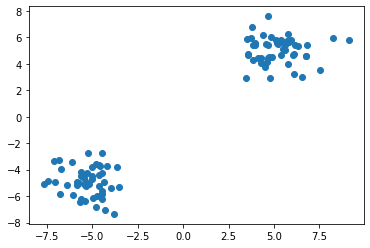

In [5]:
plt.scatter(x[:,0],x[:,1])

In [7]:
# decide clusters
# select random clusters
# Assign cluters
# move centroids
# check finish

In [19]:
# import random
# class KMeans:
#     def __init__(self,n_clusters=2,max_iter=100):
#         self.n_clusters = n_clusters
#         self.max_iter = max_iter
#         self.centroids = None
        
#     def fit_predict(self,x):
        
#         random_index = random.sample(range(0,x.shape[0]),self.n_clusters)
#         self.centroids = x[random_index]
        
#         for i in range(self.max_iter):
#             # Assign cluters
#             cluster_group = self.assign_clusters(x)
#             old_centroids = self.centroids
            
#             # move centroids
#             self.centroids = self.move_centroids(x,cluster_group)
            
#             # check finish
#             if (old_centroids == self.centroids):
#                 break
#         return cluster_group
            
#     def assign_clusters(self,x):
#         cluster_group = []
#         distances = []
        
#         for row in x:
#             for centroid in self.centroids:
#                 distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
#             min_distance = min(distances)
#             index_pos = distances.index(min_distance)
#             distances.clear()
            
#         return np.array(cluster_group)
    
#     def move_centroids(self,x,cluster_group):
#         new_centroids = []
#         cluster_type = np.unique(cluster_group)
#         for type in cluster_type:
#             new_centroids.append(x[cluster_group==type].mean(axis=0))
#         return np.array(new_centroids)
    
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

        
        

In [20]:
km = KMeans()
y_means = km.fit_predict(x)

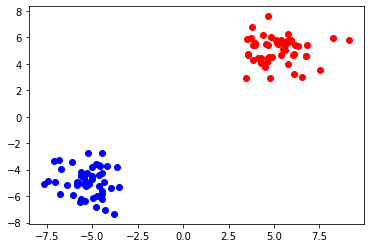

In [22]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color='red')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],color='blue')

# USING KMEANS LIBRARY ON DATASET

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('student_clustering.csv')

In [26]:
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


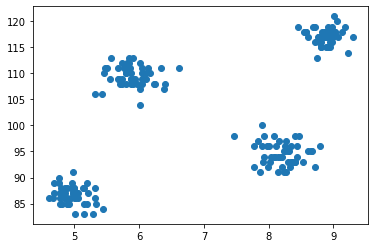

In [27]:
plt.scatter(df['cgpa'],df['iq'])

In [28]:
from sklearn.cluster import KMeans

In [29]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [30]:
wcss

[29957.898288,
 4184.14127,
 2364.0055834200834,
 681.96966,
 514.1616803171114,
 388.85240268759816,
 295.4391895943192,
 241.70118319588107,
 201.05722088123395,
 171.56716356743664]

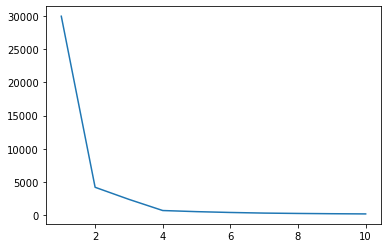

In [32]:
plt.plot(range(1,11),wcss)

In [35]:
x =df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(x)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


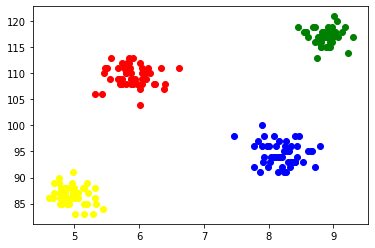

In [36]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color='red')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],color='blue')
plt.scatter(x[y_means == 2,0],x[y_means == 2,1],color='green')
plt.scatter(x[y_means == 3,0],x[y_means == 3,1],color='yellow')
plt.show()